# Deloitte - NYC Department of Health and Mental Hygiene
- Author - Jenny Choi
- Modify date - 5/9/2022

# < Data Acqusition >

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# reading data in
MASTER = pd.read_csv('20220502 all_combined_4yr_data.csv')
MASTER

# the step-by-step process of the data cleaning is available in the other notebook file

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Crit FREQ,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,...,2.0,200.0,200.0,80.000000,54278.0,14131491.0,2.5,1.0,1650.0,660.000000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,1.5,200.0,200.0,133.333333,59820.0,25604184.0,2.5,1.0,2200.0,1466.666667
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,...,1.0,200.0,200.0,200.000000,103792.0,16174853.0,1.0,1.0,300.0,300.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,...,1.0,300.0,300.0,300.000000,32549.0,25604184.0,1.0,1.0,600.0,600.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,...,1.0,300.0,300.0,300.000000,85807.0,25604184.0,2.0,1.0,1300.0,1300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,...,1.0,350.0,350.0,350.000000,40786.0,22721487.0,5.0,1.0,1800.0,1800.000000
25939,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,...,1.0,200.0,200.0,200.000000,75340.0,22721487.0,1.0,1.0,350.0,350.000000
25940,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,...,1.0,350.0,350.0,350.000000,60659.0,22721487.0,2.0,1.0,650.0,650.000000
25941,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,...,1.0,200.0,200.0,200.000000,58305.0,14131491.0,1.0,1.0,600.0,600.000000


# < Data Cleaning >

In [3]:
MASTER

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Crit FREQ,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine
0,30075445,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVENUE,10462,7188924968,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,...,2.0,200.0,200.0,80.000000,54278.0,14131491.0,2.5,1.0,1650.0,660.000000
1,30112340,WENDY'S,Brooklyn,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,2019-03-04,Violations were cited in the following area(s).,...,1.5,200.0,200.0,133.333333,59820.0,25604184.0,2.5,1.0,2200.0,1466.666667
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Manhattan,351,WEST 57 STREET,10019,2122452912,Irish,2019-06-06,Violations were cited in the following area(s).,...,1.0,200.0,200.0,200.000000,103792.0,16174853.0,1.0,1.0,300.0,300.000000
3,40356018,RIVIERA CATERERS,Brooklyn,2780,STILLWELL AVENUE,11224,7183723031,American,2018-10-30,Violations were cited in the following area(s).,...,1.0,300.0,300.0,300.000000,32549.0,25604184.0,1.0,1.0,600.0,600.000000
4,40356483,WILKEN'S FINE FOOD,Brooklyn,7114,AVENUE U,11234,7184443838,Sandwiches,2019-05-03,Violations were cited in the following area(s).,...,1.0,300.0,300.0,300.000000,85807.0,25604184.0,2.0,1.0,1300.0,1300.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,50117365,SHANGHAI YOU GARDEN,Queens,13524,40TH RD,11354,7188886188,Chinese,2021-12-03,Violations were cited in the following area(s).,...,1.0,350.0,350.0,350.000000,40786.0,22721487.0,5.0,1.0,1800.0,1800.000000
25939,50117424,THE FLYING FOX TAVERN,Queens,678,WOODWARD AVENUE,11385,7186736384,American,2021-12-03,Violations were cited in the following area(s).,...,1.0,200.0,200.0,200.000000,75340.0,22721487.0,1.0,1.0,350.0,350.000000
25940,50117434,LA POLLERA COLORADA,Queens,8213,NORTHERN BLVD,11372,7184246531,Spanish,2021-12-13,Violations were cited in the following area(s).,...,1.0,350.0,350.0,350.000000,60659.0,22721487.0,2.0,1.0,650.0,650.000000
25941,50117547,ORIGINAL JOE'S PIZZA,Bronx,2136,WILLIAMSBRIDGE ROAD,10461,9149075052,Pizza,2021-12-13,Violations were cited in the following area(s).,...,1.0,200.0,200.0,200.000000,58305.0,14131491.0,1.0,1.0,600.0,600.000000


In [4]:
# Data Cleaning: snapshot of the data with examples
# https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split/notebook

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)


from fast_ml.utilities import display_all
from fast_ml import eda

MASTER_summary = eda.df_info(MASTER)
display_all(MASTER_summary)


,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
CAMIS,int64,Numerical,25941,"[30075445, 30112340, 30191841, 40356018, 40356...",0,0.0
DBA,object,Categorical,20778,"[MORRIS PARK BAKE SHOP, WENDY'S, DJ REYNOLDS P...",5,0.019273
BORO,object,Categorical,6,"[Bronx, Brooklyn, Manhattan, Queens, Staten Is...",0,0.0
BUILDING,object,Categorical,7301,"[1007, 469, 351, 2780, 7114, 1839, 2300, 1, 13...",71,0.273677
STREET,object,Categorical,2332,"[MORRIS PARK AVENUE, FLATBUSH AVENUE, WEST 5...",0,0.0
ZIPCODE,int64,Numerical,226,"[10462, 11225, 10019, 11224, 11234, 11226, 104...",0,0.0
PHONE,object,Categorical,24355,"[7188924968, 7182875005, 2122452912, 718372303...",2,0.007709
CUISINE DESCRIPTION,object,Categorical,87,"[Bakery Products/Desserts, Hamburgers, Irish, ...",0,0.0
INSPECTION DATE,object,Categorical,804,"[2019-05-16, 2019-03-04, 2019-06-06, 2018-10-3...",0,0.0
ACTION,object,Categorical,4,[Violations were cited in the following area(s...,0,0.0


In [5]:
# Data Cleaning: satats of data in numeric format
MASTER.describe()


,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Crit FREQ,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine
count,2.594300e+04,25943.000000,25943.000000,25902.000000,25902.000000,25432.000000,25433.000000,25433.000000,2.529400e+04,2.584000e+04,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,24870.000000,25140.000000,25140.000000,25140.000000,23577.000000,2.454300e+04,23481.000000,24548.000000,24548.000000,24548.000000
mean,4.699069e+07,10511.427823,16.184597,40.086931,-72.778701,249.088628,20.048166,28976.771557,2.517362e+06,2.400124e+09,2018.613036,12.563852,14.319878,13.027002,1.697918,1.563681,317.901750,317.969372,221.877815,83276.122450,1.945350e+07,3.019764,1.187510,2236.000896,1216.904512
std,4.228724e+06,1459.251264,13.367548,5.071782,9.207426,131.266131,15.799263,30747.489915,1.354448e+06,1.349020e+09,0.921067,9.156466,7.810161,7.418107,0.857532,0.851053,147.034115,147.164460,131.227807,36522.872554,5.158916e+06,2.315464,0.413145,2141.399636,818.460208
min,3.007544e+07,0.000000,0.000000,0.000000,-74.248708,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,2018.000000,0.000000,0.000000,0.000000,1.000000,0.333333,200.000000,200.000000,28.571429,21447.000000,4.710350e+06,1.000000,1.000000,0.000000,0.000000
25%,4.154029e+07,10021.000000,9.000000,40.685747,-73.989026,105.000000,4.000000,8000.000000,1.044835e+06,1.010360e+09,2018.000000,8.000000,9.500000,9.000000,1.000000,1.000000,200.000000,200.000000,133.333333,54457.000000,1.617485e+07,1.000000,1.000000,650.000000,600.000000
50%,5.004366e+07,10467.000000,12.000000,40.732548,-73.958550,301.000000,20.000000,16100.000000,3.007268e+06,3.001515e+09,2018.000000,11.000000,12.857143,12.000000,1.500000,1.333333,300.000000,300.000000,200.000000,76234.000000,1.617485e+07,2.333333,1.000000,1550.000000,1100.000000
75%,5.008311e+07,11228.000000,20.000000,40.761859,-73.898958,401.000000,34.000000,40502.000000,4.001464e+06,4.001620e+09,2019.000000,13.000000,17.750000,15.000000,2.000000,2.000000,350.000000,350.000000,300.000000,113191.000000,2.560418e+07,4.000000,1.000000,3100.000000,1650.000000
max,5.011760e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,2021.000000,133.000000,133.000000,133.000000,7.000000,7.000000,1000.000000,1000.000000,850.000000,250001.000000,2.560418e+07,23.000000,4.000000,22800.000000,7566.666667


In [6]:
# Data Cleaning: non-null values count & data type
MASTER.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  25943 non-null  int64  
 1   DBA                    25938 non-null  object 
 2   BORO                   25943 non-null  object 
 3   BUILDING               25872 non-null  object 
 4   STREET                 25943 non-null  object 
 5   ZIPCODE                25943 non-null  int64  
 6   PHONE                  25941 non-null  object 
 7   CUISINE DESCRIPTION    25943 non-null  object 
 8   INSPECTION DATE        25943 non-null  object 
 9   ACTION                 25943 non-null  object 
 10  VIOLATION CODE         25678 non-null  object 
 11  VIOLATION DESCRIPTION  25757 non-null  object 
 12  CRITICAL FLAG          25943 non-null  object 
 13  SCORE                  25943 non-null  float64
 14  GRADE                  14882 non-null  object 
 15  GR

In [7]:
# Data Cleaning:removing the columns in dataset where we won't be using
#MASTER_dropped = MASTER.drop(columns=['BUILDING','GRADE DATE', 'Community Board', 'Council District', 'Census Tract','BIN','BBL','NTA','DBA','Latitude','Longitude' ])
MASTER_dropped = MASTER.drop(columns=['PHONE', 'BUILDING','GRADE DATE', 'Community Board', 'Council District', 'Census Tract','BIN','BBL','NTA','DBA','Latitude','Longitude' ])

MASTER_dropped

# Data Cleaning: counting null values
count_nan_in_MASTER_dropped = MASTER_dropped.isnull().sum()
print(count_nan_in_MASTER_dropped)

CAMIS                        0
BORO                         0
STREET                       0
ZIPCODE                      0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             265
VIOLATION DESCRIPTION      186
CRITICAL FLAG                0
SCORE                        0
GRADE                    11061
RECORD DATE                  0
INSPECTION TYPE              0
INSPECTION YEAR              0
LATEST SCORE                 0
AVG. SCORE                   0
MEDIAN SCORE                 0
INSP FREQ                    0
CRITICAL FREQ             1073
FINE AMOUNT                803
TOTAL FINE AMOUNT          803
AVG. FINE AMOUNT           803
MEDIAN INCOME             2366
TOTAL POPULATION          1400
Crit FREQ                 2462
BINNED_Avg.CritFine       1395
TOTAL CRITICAL FINE       1395
Avg.CritFine              1395
dtype: int64


In [8]:
# Data Cleaning: evaluating variables - correlation
# If there are some features highly correlated, in such a case, one of the two features could be dropped
# https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8

MASTER_dropped.corr()

# AVG. SCORE VS MEDIAN SCORE             --> keep MEDIAN SCORE
# INSP FREQ VS Crit FREQ                 --> keep INSP FREQ
# CRITICAL FREQ VS TOTAL CRITICAL FINE   --> keep CRITICAL FREQ
# FINE AMOUNT VS TOTAL FINE AMOUNT       --> keep FINE AMOUNT
# CRITICAL FREQ VS TOTAL CRITICAL FINE   --> keep CRITICAL FREQ


,CAMIS,ZIPCODE,SCORE,INSPECTION YEAR,LATEST SCORE,AVG. SCORE,MEDIAN SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,TOTAL FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Crit FREQ,BINNED_Avg.CritFine,TOTAL CRITICAL FINE,Avg.CritFine
CAMIS,1.000000,0.079740,0.112072,0.264634,0.039371,0.099850,0.109786,-0.013566,0.000309,0.032804,0.033114,0.043505,-0.069696,0.062908,0.034183,-0.043834,-0.054142,-0.076133
ZIPCODE,0.079740,1.000000,0.032727,0.052842,0.035197,0.045387,0.044050,0.033556,0.029530,-0.007024,-0.007174,-0.025554,-0.429091,0.351712,0.022027,0.001823,0.022721,0.020079
SCORE,0.112072,0.032727,1.000000,0.109863,0.280046,0.730667,0.619490,0.358571,0.343576,0.160197,0.161161,-0.126451,-0.046659,0.027320,0.494494,0.264156,0.411565,0.385423
INSPECTION YEAR,0.264634,0.052842,0.109863,1.000000,0.133607,0.162104,0.240047,-0.226882,-0.169323,0.002660,0.002852,0.187744,-0.043135,0.049206,-0.062118,-0.165390,-0.284839,-0.267362
LATEST SCORE,0.039371,0.035197,0.280046,0.133607,1.000000,0.665173,0.678930,0.063620,0.113585,0.057501,0.057870,0.008127,-0.045085,0.015659,0.271441,0.394465,0.316820,0.493646
AVG. SCORE,0.099850,0.045387,0.730667,0.162104,0.665173,1.000000,0.926923,0.348907,0.381297,0.137687,0.138524,-0.123310,-0.066597,0.029501,0.606579,0.441143,0.537630,0.605635
MEDIAN SCORE,0.109786,0.044050,0.619490,0.240047,0.678930,0.926923,1.000000,0.229689,0.273391,0.124138,0.124610,-0.047410,-0.064673,0.027182,0.498206,0.375864,0.421783,0.519885
INSP FREQ,-0.013566,0.033556,0.358571,-0.226882,0.063620,0.348907,0.229689,1.000000,0.945144,0.116579,0.116233,-0.533079,-0.051500,0.043336,0.823457,0.188287,0.742807,0.321445
CRITICAL FREQ,0.000309,0.029530,0.343576,-0.169323,0.113585,0.381297,0.273391,0.945144,1.000000,0.125142,0.124852,-0.485428,-0.049431,0.037485,0.820078,0.224322,0.761462,0.367448
FINE AMOUNT,0.032804,-0.007024,0.160197,0.002660,0.057501,0.137687,0.124138,0.116579,0.125142,1.000000,0.999224,0.683336,-0.012504,-0.001659,0.105060,0.107736,0.172084,0.209855


In [9]:
# Modling: evaluating variables - correlation
# if there are some features highly correlated. In such a case, one of the two features could be dropped
# https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8

MASTER.corr()['LATEST SCORE']


CAMIS                  0.039371
ZIPCODE                0.035197
SCORE                  0.280046
Latitude               0.028200
Longitude             -0.027945
Community Board        0.025223
Council District       0.021670
Census Tract           0.028247
BIN                    0.024663
BBL                    0.032392
INSPECTION YEAR        0.133607
LATEST SCORE           1.000000
AVG. SCORE             0.665173
MEDIAN SCORE           0.678930
INSP FREQ              0.063620
CRITICAL FREQ          0.113585
FINE AMOUNT            0.057501
TOTAL FINE AMOUNT      0.057870
AVG. FINE AMOUNT       0.008127
MEDIAN INCOME         -0.045085
TOTAL POPULATION       0.015659
Crit FREQ              0.271441
BINNED_Avg.CritFine    0.394465
TOTAL CRITICAL FINE    0.316820
Avg.CritFine           0.493646
Name: LATEST SCORE, dtype: float64

In [10]:
# Data Cleaning: evaluating variables - correlation
# dropping highly correlated columns/ variables (above 80%)
# If there are some features highly correlated, in such a case, one of the two features could be dropped
# https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8

MASTER_dropped_correlated = MASTER_dropped.drop(columns=['AVG. SCORE', 'MEDIAN SCORE', 'Crit FREQ', 
                                                         'TOTAL FINE AMOUNT', 'TOTAL CRITICAL FINE'])

# AVG. SCORE VS MEDIAN SCORE             --> keep MEDIAN SCORE
# INSP FREQ VS Crit FREQ                 --> keep INSP FREQ
# CRITICAL FREQ VS TOTAL CRITICAL FINE   --> keep CRITICAL FREQ
# FINE AMOUNT VS TOTAL FINE AMOUNT       --> keep FINE AMOUNT
# CRITICAL FREQ VS TOTAL CRITICAL FINE   --> keep CRITICAL FREQ

MASTER_dropped_correlated.corr()


,CAMIS,ZIPCODE,SCORE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine
CAMIS,1.000000,0.079740,0.112072,0.264634,0.039371,-0.013566,0.000309,0.032804,0.043505,-0.069696,0.062908,-0.043834,-0.076133
ZIPCODE,0.079740,1.000000,0.032727,0.052842,0.035197,0.033556,0.029530,-0.007024,-0.025554,-0.429091,0.351712,0.001823,0.020079
SCORE,0.112072,0.032727,1.000000,0.109863,0.280046,0.358571,0.343576,0.160197,-0.126451,-0.046659,0.027320,0.264156,0.385423
INSPECTION YEAR,0.264634,0.052842,0.109863,1.000000,0.133607,-0.226882,-0.169323,0.002660,0.187744,-0.043135,0.049206,-0.165390,-0.267362
LATEST SCORE,0.039371,0.035197,0.280046,0.133607,1.000000,0.063620,0.113585,0.057501,0.008127,-0.045085,0.015659,0.394465,0.493646
INSP FREQ,-0.013566,0.033556,0.358571,-0.226882,0.063620,1.000000,0.945144,0.116579,-0.533079,-0.051500,0.043336,0.188287,0.321445
CRITICAL FREQ,0.000309,0.029530,0.343576,-0.169323,0.113585,0.945144,1.000000,0.125142,-0.485428,-0.049431,0.037485,0.224322,0.367448
FINE AMOUNT,0.032804,-0.007024,0.160197,0.002660,0.057501,0.116579,0.125142,1.000000,0.683336,-0.012504,-0.001659,0.107736,0.209855
AVG. FINE AMOUNT,0.043505,-0.025554,-0.126451,0.187744,0.008127,-0.533079,-0.485428,0.683336,1.000000,0.017488,-0.027497,-0.070107,-0.073689
MEDIAN INCOME,-0.069696,-0.429091,-0.046659,-0.043135,-0.045085,-0.051500,-0.049431,-0.012504,0.017488,1.000000,-0.205765,-0.024553,-0.037852


In [11]:
# Data Cleaning: counting null values
count_nan_in_MASTER_dropped_correlated = MASTER_dropped_correlated.isnull().sum()
print(count_nan_in_MASTER_dropped_correlated)

CAMIS                        0
BORO                         0
STREET                       0
ZIPCODE                      0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             265
VIOLATION DESCRIPTION      186
CRITICAL FLAG                0
SCORE                        0
GRADE                    11061
RECORD DATE                  0
INSPECTION TYPE              0
INSPECTION YEAR              0
LATEST SCORE                 0
INSP FREQ                    0
CRITICAL FREQ             1073
FINE AMOUNT                803
AVG. FINE AMOUNT           803
MEDIAN INCOME             2366
TOTAL POPULATION          1400
BINNED_Avg.CritFine       1395
Avg.CritFine              1395
dtype: int64


In [12]:
# Data Cleaning: replacing null/missing vlaues with '0' in the columns 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'Crit FREQ'    
#                because we still need these columns of data
#                we replace them with '0' (not avg) because they simply don't have records because they did not violated.

MASTER_dropped_correlated['CRITICAL FREQ'] = MASTER_dropped_correlated['CRITICAL FREQ'].fillna(0)
MASTER_dropped_correlated['FINE AMOUNT'] = MASTER_dropped_correlated['FINE AMOUNT'].fillna(0)
MASTER_dropped_correlated['AVG. FINE AMOUNT'] = MASTER_dropped_correlated['AVG. FINE AMOUNT'].fillna(0)
MASTER_dropped_correlated['Avg.CritFine'] = MASTER_dropped_correlated['Avg.CritFine'].fillna(0)


In [13]:
# Data Cleaning: replacing missing values with avg. score for 'MEDIAN INCOME'
# PH: DON'T USE EQUAL SIGN AND INPLACE=TRUE !! Inplace=True returns None

# (X) MASTER_dropped['MEDIAN INCOME'] = MASTER_dropped['MEDIAN INCOME'].fillna(value=MASTER_dropped['MEDIAN INCOME'].mean(), inplace=True)
MASTER_dropped_correlated['MEDIAN INCOME'].fillna(value=MASTER_dropped_correlated['MEDIAN INCOME'].mean(), inplace=True)
MASTER_dropped_correlated['TOTAL POPULATION'].fillna(value=MASTER_dropped_correlated['TOTAL POPULATION'].mean(), inplace=True)



In [14]:
# Data Cleaning: counting null values
count_nan_in_MASTER_dropped_correlated = MASTER_dropped_correlated.isnull().sum()
print(count_nan_in_MASTER_dropped_correlated)


CAMIS                        0
BORO                         0
STREET                       0
ZIPCODE                      0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             265
VIOLATION DESCRIPTION      186
CRITICAL FLAG                0
SCORE                        0
GRADE                    11061
RECORD DATE                  0
INSPECTION TYPE              0
INSPECTION YEAR              0
LATEST SCORE                 0
INSP FREQ                    0
CRITICAL FREQ                0
FINE AMOUNT                  0
AVG. FINE AMOUNT             0
MEDIAN INCOME                0
TOTAL POPULATION             0
BINNED_Avg.CritFine       1395
Avg.CritFine                 0
dtype: int64


In [15]:
# Data Cleaning: to handle missing values for 'GRADE', we're going to create a new column 'TARGET' and delete 
# the original column'GRADE', adding a target classification column
conditions = [
    (MASTER_dropped_correlated['LATEST SCORE'] <= 13),
    (MASTER_dropped_correlated['LATEST SCORE'] > 13) & (MASTER_dropped_correlated['LATEST SCORE'] <= 27),
    (MASTER_dropped_correlated['LATEST SCORE'] > 27) & (MASTER_dropped_correlated['LATEST SCORE'] <= 50),
    (MASTER_dropped_correlated['LATEST SCORE']> 50)
    ]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C', 'D']

# create a new column and use np.select to assign values to it using our lists as arguments
MASTER_dropped_correlated['TARGET'] = np.select(conditions, values)

# Data Cleaning:removing the columns in dataset where we won't be using
MASTER_dropped_correlated = MASTER_dropped_correlated.drop(columns=['GRADE'])
MASTER_dropped_correlated

# display updated DataFrame
MASTER_dropped_correlated.head()


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,RECORD DATE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET
0,30075445,Bronx,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2019-05-16,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,14.0,2022-01-29,Cycle Inspection / Initial Inspection,2019,5.0,2.5,2.0,200.0,80.000000,54278.0,14131491.0,1.0,660.000000,A
1,30112340,Brooklyn,FLATBUSH AVENUE,11225,Hamburgers,2019-03-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,13.0,2022-01-29,Cycle Inspection / Initial Inspection,2019,20.0,1.5,1.5,200.0,133.333333,59820.0,25604184.0,1.0,1466.666667,B
2,30191841,Manhattan,WEST 57 STREET,10019,Irish,2019-06-06,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,2022-01-29,Cycle Inspection / Initial Inspection,2019,8.0,1.0,1.0,200.0,200.000000,103792.0,16174853.0,1.0,300.000000,A
3,40356018,Brooklyn,STILLWELL AVENUE,11224,American,2018-10-30,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,10.0,2022-01-29,Cycle Inspection / Initial Inspection,2018,10.0,1.0,1.0,300.0,300.000000,32549.0,25604184.0,1.0,600.000000,A
4,40356483,Brooklyn,AVENUE U,11234,Sandwiches,2019-05-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,13.0,2022-01-29,Cycle Inspection / Initial Inspection,2019,14.0,1.0,1.0,300.0,300.000000,85807.0,25604184.0,1.0,1300.000000,B


In [16]:
# Data Cleaning: counting null values
count_nan_in_MASTER_dropped_correlated = MASTER_dropped_correlated.isnull().sum()
print(count_nan_in_MASTER_dropped_correlated)


CAMIS                       0
BORO                        0
STREET                      0
ZIPCODE                     0
CUISINE DESCRIPTION         0
INSPECTION DATE             0
ACTION                      0
VIOLATION CODE            265
VIOLATION DESCRIPTION     186
CRITICAL FLAG               0
SCORE                       0
RECORD DATE                 0
INSPECTION TYPE             0
INSPECTION YEAR             0
LATEST SCORE                0
INSP FREQ                   0
CRITICAL FREQ               0
FINE AMOUNT                 0
AVG. FINE AMOUNT            0
MEDIAN INCOME               0
TOTAL POPULATION            0
BINNED_Avg.CritFine      1395
Avg.CritFine                0
TARGET                      0
dtype: int64


In [17]:
# Data Cleaning: non-null values count & data type
MASTER_dropped_correlated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  25943 non-null  int64  
 1   BORO                   25943 non-null  object 
 2   STREET                 25943 non-null  object 
 3   ZIPCODE                25943 non-null  int64  
 4   CUISINE DESCRIPTION    25943 non-null  object 
 5   INSPECTION DATE        25943 non-null  object 
 6   ACTION                 25943 non-null  object 
 7   VIOLATION CODE         25678 non-null  object 
 8   VIOLATION DESCRIPTION  25757 non-null  object 
 9   CRITICAL FLAG          25943 non-null  object 
 10  SCORE                  25943 non-null  float64
 11  RECORD DATE            25943 non-null  object 
 12  INSPECTION TYPE        25943 non-null  object 
 13  INSPECTION YEAR        25943 non-null  int64  
 14  LATEST SCORE           25943 non-null  float64
 15  IN

In [18]:
# Data Cleaning:removing the columns in dataset where we won't be using
MASTER_dropped_correlated = MASTER_dropped_correlated.drop(columns=['ACTION','VIOLATION DESCRIPTION','RECORD DATE'])
MASTER_dropped_correlated


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET
0,30075445,Bronx,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2019-05-16,08A,Not Critical,14.0,Cycle Inspection / Initial Inspection,2019,5.0,2.5,2.0,200.0,80.000000,54278.0,14131491.0,1.0,660.000000,A
1,30112340,Brooklyn,FLATBUSH AVENUE,11225,Hamburgers,2019-03-04,10F,Not Critical,13.0,Cycle Inspection / Initial Inspection,2019,20.0,1.5,1.5,200.0,133.333333,59820.0,25604184.0,1.0,1466.666667,B
2,30191841,Manhattan,WEST 57 STREET,10019,Irish,2019-06-06,10F,Not Critical,8.0,Cycle Inspection / Initial Inspection,2019,8.0,1.0,1.0,200.0,200.000000,103792.0,16174853.0,1.0,300.000000,A
3,40356018,Brooklyn,STILLWELL AVENUE,11224,American,2018-10-30,06D,Critical,10.0,Cycle Inspection / Initial Inspection,2018,10.0,1.0,1.0,300.0,300.000000,32549.0,25604184.0,1.0,600.000000,A
4,40356483,Brooklyn,AVENUE U,11234,Sandwiches,2019-05-03,06C,Critical,13.0,Cycle Inspection / Initial Inspection,2019,14.0,1.0,1.0,300.0,300.000000,85807.0,25604184.0,1.0,1300.000000,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25938,50117365,Queens,40TH RD,11354,Chinese,2021-12-03,04K,Critical,30.0,Pre-permit (Operational) / Initial Inspection,2021,30.0,1.0,1.0,350.0,350.000000,40786.0,22721487.0,1.0,1800.000000,C
25939,50117424,Queens,WOODWARD AVENUE,11385,American,2021-12-03,10B,Not Critical,14.0,Pre-permit (Non-operational) / Initial Inspection,2021,14.0,1.0,1.0,200.0,200.000000,75340.0,22721487.0,1.0,350.000000,B
25940,50117434,Queens,NORTHERN BLVD,11372,Spanish,2021-12-13,04L,Critical,21.0,Pre-permit (Operational) / Initial Inspection,2021,21.0,1.0,1.0,350.0,350.000000,60659.0,22721487.0,1.0,650.000000,B
25941,50117547,Bronx,WILLIAMSBRIDGE ROAD,10461,Pizza,2021-12-13,10F,Not Critical,13.0,Pre-permit (Operational) / Initial Inspection,2021,13.0,1.0,1.0,200.0,200.000000,58305.0,14131491.0,1.0,600.000000,A


In [19]:
# Data Cleaning: non-null values count & data type
MASTER_dropped_correlated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMIS                25943 non-null  int64  
 1   BORO                 25943 non-null  object 
 2   STREET               25943 non-null  object 
 3   ZIPCODE              25943 non-null  int64  
 4   CUISINE DESCRIPTION  25943 non-null  object 
 5   INSPECTION DATE      25943 non-null  object 
 6   VIOLATION CODE       25678 non-null  object 
 7   CRITICAL FLAG        25943 non-null  object 
 8   SCORE                25943 non-null  float64
 9   INSPECTION TYPE      25943 non-null  object 
 10  INSPECTION YEAR      25943 non-null  int64  
 11  LATEST SCORE         25943 non-null  float64
 12  INSP FREQ            25943 non-null  float64
 13  CRITICAL FREQ        25943 non-null  float64
 14  FINE AMOUNT          25943 non-null  float64
 15  AVG. FINE AMOUNT     25943 non-null 

In [20]:
# Data Cleaning:turning categorical data into numeric to use packages
MASTER_dropped_correlated['BORO'] = MASTER_dropped_correlated['BORO'].astype('category')
MASTER_dropped_correlated['STREET'] = MASTER_dropped_correlated['STREET'].astype('category')
MASTER_dropped_correlated['ZIPCODE'] = MASTER_dropped_correlated['ZIPCODE'].astype('object')

MASTER_dropped_correlated['CUISINE DESCRIPTION'] = MASTER_dropped_correlated['CUISINE DESCRIPTION'].astype('category')

MASTER_dropped_correlated['TARGET'] = MASTER_dropped_correlated['TARGET'].astype('category')
#MASTER_dropped['MEDIAN INCOME'] = MASTER_dropped['MEDIAN INCOME'].astype('float64')

MASTER_dropped_correlated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CAMIS                25943 non-null  int64   
 1   BORO                 25943 non-null  category
 2   STREET               25943 non-null  category
 3   ZIPCODE              25943 non-null  object  
 4   CUISINE DESCRIPTION  25943 non-null  category
 5   INSPECTION DATE      25943 non-null  object  
 6   VIOLATION CODE       25678 non-null  object  
 7   CRITICAL FLAG        25943 non-null  object  
 8   SCORE                25943 non-null  float64 
 9   INSPECTION TYPE      25943 non-null  object  
 10  INSPECTION YEAR      25943 non-null  int64   
 11  LATEST SCORE         25943 non-null  float64 
 12  INSP FREQ            25943 non-null  float64 
 13  CRITICAL FREQ        25943 non-null  float64 
 14  FINE AMOUNT          25943 non-null  float64 
 15  AVG. FINE AMOUNT   

In [21]:
# Data Cleaning:turning categorical data into numeric to use packages - encoding categorical variables to numeric
# https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
MASTER_dropped_correlated['BORO CAT'] = le.fit_transform(MASTER_dropped_correlated['BORO'])
MASTER_dropped_correlated['STREET CAT'] = le.fit_transform(MASTER_dropped_correlated['STREET'])
MASTER_dropped_correlated['CUISINE CAT'] = le.fit_transform(MASTER_dropped_correlated['CUISINE DESCRIPTION'])
MASTER_dropped_correlated['TARGET CAT'] = le.fit_transform(MASTER_dropped_correlated['TARGET'])

MASTER_dropped_correlated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CAMIS                25943 non-null  int64   
 1   BORO                 25943 non-null  category
 2   STREET               25943 non-null  category
 3   ZIPCODE              25943 non-null  object  
 4   CUISINE DESCRIPTION  25943 non-null  category
 5   INSPECTION DATE      25943 non-null  object  
 6   VIOLATION CODE       25678 non-null  object  
 7   CRITICAL FLAG        25943 non-null  object  
 8   SCORE                25943 non-null  float64 
 9   INSPECTION TYPE      25943 non-null  object  
 10  INSPECTION YEAR      25943 non-null  int64   
 11  LATEST SCORE         25943 non-null  float64 
 12  INSP FREQ            25943 non-null  float64 
 13  CRITICAL FREQ        25943 non-null  float64 
 14  FINE AMOUNT          25943 non-null  float64 
 15  AVG. FINE AMOUNT   

In [22]:
# Data Cleaning: turning the date format to use packages 
# https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

MASTER_dropped_correlated['INSPECTION DATE CLEANED'] = pd.to_datetime(MASTER_dropped_correlated['INSPECTION DATE'], 
 format = '%Y-%m-%dT%', errors = 'coerce')

MASTER_dropped_correlated['INSPECTION DATE CLEANED'] = MASTER_dropped_correlated['INSPECTION DATE CLEANED'].values.astype(float)


MASTER_dropped_correlated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CAMIS                    25943 non-null  int64   
 1   BORO                     25943 non-null  category
 2   STREET                   25943 non-null  category
 3   ZIPCODE                  25943 non-null  object  
 4   CUISINE DESCRIPTION      25943 non-null  category
 5   INSPECTION DATE          25943 non-null  object  
 6   VIOLATION CODE           25678 non-null  object  
 7   CRITICAL FLAG            25943 non-null  object  
 8   SCORE                    25943 non-null  float64 
 9   INSPECTION TYPE          25943 non-null  object  
 10  INSPECTION YEAR          25943 non-null  int64   
 11  LATEST SCORE             25943 non-null  float64 
 12  INSP FREQ                25943 non-null  float64 
 13  CRITICAL FREQ            25943 non-null  float64 
 14  FINE A

In [23]:
MASTER_dropped_correlated.head(30)


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
0,30075445,Bronx,MORRIS PARK AVENUE,10462,Bakery Products/Desserts,2019-05-16,08A,Not Critical,14.0,Cycle Inspection / Initial Inspection,2019,5.0,2.500000,2.000000,200.0,80.000000,54278.00000,1.413149e+07,1.0,660.000000,A,1,1574,7,0,1.557965e+18
1,30112340,Brooklyn,FLATBUSH AVENUE,11225,Hamburgers,2019-03-04,10F,Not Critical,13.0,Cycle Inspection / Initial Inspection,2019,20.0,1.500000,1.500000,200.0,133.333333,59820.00000,2.560418e+07,1.0,1466.666667,B,2,1128,38,1,1.551658e+18
2,30191841,Manhattan,WEST 57 STREET,10019,Irish,2019-06-06,10F,Not Critical,8.0,Cycle Inspection / Initial Inspection,2019,8.0,1.000000,1.000000,200.0,200.000000,103792.00000,1.617485e+07,1.0,300.000000,A,3,2133,45,0,1.559779e+18
3,40356018,Brooklyn,STILLWELL AVENUE,11224,American,2018-10-30,06D,Critical,10.0,Cycle Inspection / Initial Inspection,2018,10.0,1.000000,1.000000,300.0,300.000000,32549.00000,2.560418e+07,1.0,600.000000,A,2,1913,2,0,1.540858e+18
4,40356483,Brooklyn,AVENUE U,11234,Sandwiches,2019-05-03,06C,Critical,13.0,Cycle Inspection / Initial Inspection,2019,14.0,1.000000,1.000000,300.0,300.000000,85807.00000,2.560418e+07,1.0,1300.000000,B,2,508,70,1,1.556842e+18
5,40356731,Brooklyn,NOSTRAND AVENUE,11226,Frozen Desserts,2019-05-31,10F,Not Critical,10.0,Cycle Inspection / Initial Inspection,2019,13.0,1.000000,1.000000,200.0,200.000000,58257.00000,2.560418e+07,1.0,650.000000,A,2,1654,33,0,1.559261e+18
6,40357217,Bronx,SOUTHERN BOULEVARD,10460,American,2019-05-22,04L,Critical,10.0,Cycle Inspection / Initial Inspection,2019,10.0,1.000000,1.000000,350.0,350.000000,27545.00000,1.413149e+07,1.0,950.000000,A,1,1887,2,0,1.558483e+18
7,40359480,Manhattan,EAST 66 STREET,10065,American,2018-09-28,10F,Not Critical,7.0,Cycle Inspection / Initial Inspection,2018,9.0,1.000000,1.000000,200.0,200.000000,148441.00000,1.617485e+07,1.0,900.000000,A,3,943,2,0,1.538093e+18
8,40359705,Brooklyn,SURF AVENUE,11224,Hotdogs,2018-03-07,06C,Critical,10.0,Cycle Inspection / Initial Inspection,2018,12.0,1.000000,1.000000,300.0,300.000000,32549.00000,2.560418e+07,1.0,600.000000,A,2,1930,40,0,1.520381e+18
9,40360045,Brooklyn,KINGS HIGHWAY,11223,Jewish/Kosher,2019-12-06,06D,Critical,8.0,Cycle Inspection / Initial Inspection,2019,8.0,1.000000,1.000000,300.0,300.000000,54023.00000,2.560418e+07,1.0,300.000000,A,2,1396,48,0,1.575590e+18


In [24]:
columns = list(MASTER_dropped_correlated)
columns

['CAMIS',
 'BORO',
 'STREET',
 'ZIPCODE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'VIOLATION CODE',
 'CRITICAL FLAG',
 'SCORE',
 'INSPECTION TYPE',
 'INSPECTION YEAR',
 'LATEST SCORE',
 'INSP FREQ',
 'CRITICAL FREQ',
 'FINE AMOUNT',
 'AVG. FINE AMOUNT',
 'MEDIAN INCOME',
 'TOTAL POPULATION',
 'BINNED_Avg.CritFine',
 'Avg.CritFine',
 'TARGET',
 'BORO CAT',
 'STREET CAT',
 'CUISINE CAT',
 'TARGET CAT',
 'INSPECTION DATE CLEANED']

# < Modeling >

In [25]:
# snapshot of the data with examples
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

from fast_ml.utilities import display_all
from fast_ml import eda

MASTER_dropped_correlated_summary = eda.df_info(MASTER_dropped_correlated)
display_all(MASTER_dropped_correlated_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
CAMIS,int64,Numerical,25941,"[30075445, 30112340, 30191841, 40356018, 40356...",0,0.0
BORO,category,category,6,"[Bronx, Brooklyn, Manhattan, Queens, Staten Is...",0,0.0
STREET,category,category,2332,"[MORRIS PARK AVENUE, FLATBUSH AVENUE, WEST 5...",0,0.0
ZIPCODE,object,Categorical,226,"[10462, 11225, 10019, 11224, 11234, 11226, 104...",0,0.0
CUISINE DESCRIPTION,category,category,87,"[Bakery Products/Desserts, Hamburgers, Irish, ...",0,0.0
INSPECTION DATE,object,Categorical,804,"[2019-05-16, 2019-03-04, 2019-06-06, 2018-10-3...",0,0.0
VIOLATION CODE,object,Categorical,59,"[08A, 10F, 06D, 06C, 04L, 09B, 06F, 04N, 02G, ...",265,1.02147
CRITICAL FLAG,object,Categorical,3,"[Not Critical, Critical, Not Applicable]",0,0.0
SCORE,float64,Numerical,127,"[14.0, 13.0, 8.0, 10.0, 7.0, 30.0, 12.0, 5.0, ...",0,0.0
INSPECTION TYPE,object,Categorical,12,"[Cycle Inspection / Initial Inspection, Cycle ...",0,0.0


In [26]:
MASTER_dropped_correlated.keys()

Index(['CAMIS', 'BORO', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'VIOLATION CODE', 'CRITICAL FLAG', 'SCORE',
       'INSPECTION TYPE', 'INSPECTION YEAR', 'LATEST SCORE', 'INSP FREQ',
       'CRITICAL FREQ', 'FINE AMOUNT', 'AVG. FINE AMOUNT', 'MEDIAN INCOME',
       'TOTAL POPULATION', 'BINNED_Avg.CritFine', 'Avg.CritFine', 'TARGET',
       'BORO CAT', 'STREET CAT', 'CUISINE CAT', 'TARGET CAT',
       'INSPECTION DATE CLEANED'],
      dtype='object')

In [27]:
# Modling: selecting unmeric columns ONLY for modeling 
# https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split/notebook

MASTER_dropped_for_modeling = MASTER_dropped_correlated[['ZIPCODE', 'INSP FREQ','CRITICAL FREQ', 'FINE AMOUNT', 
                                                         'AVG. FINE AMOUNT', 'MEDIAN INCOME','TOTAL POPULATION', 
                                                         'Avg.CritFine',  
                                                         'BORO CAT', 'STREET CAT','CUISINE CAT', 'TARGET CAT', 
                                                         'INSPECTION DATE CLEANED']] 

#excluded 'rating','price','median income','MEDIAN INCOME','STREET CAT'
#'CUISINE CAT','BORO CAT',

MASTER_dropped_for_modeling['INSPECTION DATE CLEANED'] = MASTER_dropped_for_modeling['INSPECTION DATE CLEANED'].astype(int, errors='raise')
#MASTER_dropped_for_modeling
MASTER_dropped_for_modeling.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25943 entries, 0 to 25942
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIPCODE                  25943 non-null  object 
 1   INSP FREQ                25943 non-null  float64
 2   CRITICAL FREQ            25943 non-null  float64
 3   FINE AMOUNT              25943 non-null  float64
 4   AVG. FINE AMOUNT         25943 non-null  float64
 5   MEDIAN INCOME            25943 non-null  float64
 6   TOTAL POPULATION         25943 non-null  float64
 7   Avg.CritFine             25943 non-null  float64
 8   BORO CAT                 25943 non-null  int32  
 9   STREET CAT               25943 non-null  int32  
 10  CUISINE CAT              25943 non-null  int32  
 11  TARGET CAT               25943 non-null  int32  
 12  INSPECTION DATE CLEANED  25943 non-null  int32  
dtypes: float64(7), int32(5), object(1)
memory usage: 2.1+ MB


C:\Users\zzxxc\AppData\Local\Temp/ipykernel_26744/922505836.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MASTER_dropped_for_modeling['INSPECTION DATE CLEANED'] = MASTER_dropped_for_modeling['INSPECTION DATE CLEANED'].astype(int, errors='raise')


In [28]:
MASTER_dropped_correlated.describe()

,CAMIS,SCORE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
count,2.594300e+04,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,2.594300e+04,24548.000000,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,2.594300e+04
mean,4.699069e+07,16.184597,2018.613036,12.563852,1.697918,1.499007,308.061905,215.010148,83276.122450,1.945350e+07,1.187510,1151.469451,2.865860,1125.128127,33.163165,0.276838,1.547304e+18
std,4.228724e+06,13.367548,0.921067,9.156466,0.857532,0.889542,154.858777,134.775248,34817.554314,5.017781e+06,0.413145,842.142892,0.984718,670.495607,25.879621,0.600085,3.239168e+16
min,3.007544e+07,0.000000,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,21447.000000,4.710350e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.514851e+18
25%,4.154029e+07,9.000000,2018.000000,8.000000,1.000000,1.000000,200.000000,120.000000,56911.000000,1.617485e+07,1.000000,600.000000,2.000000,510.000000,7.000000,0.000000,1.523232e+18
50%,5.004366e+07,12.000000,2018.000000,11.000000,1.500000,1.000000,300.000000,200.000000,81228.000000,1.945350e+07,1.000000,1000.000000,3.000000,1141.000000,26.000000,0.000000,1.538352e+18
75%,5.008311e+07,20.000000,2019.000000,13.000000,2.000000,2.000000,350.000000,300.000000,103792.000000,2.272149e+07,1.000000,1600.000000,4.000000,1693.000000,53.000000,0.000000,1.557792e+18
max,5.011760e+07,164.000000,2021.000000,133.000000,7.000000,7.000000,1000.000000,850.000000,250001.000000,2.560418e+07,4.000000,7566.666667,5.000000,2331.000000,86.000000,3.000000,1.640822e+18


In [29]:
# Modling: evaluating variables - correlation
# if there are some features highly correlated. In such a case, one of the two features could be dropped
# https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8

MASTER_dropped_for_modeling.corr()['TARGET CAT']


INSP FREQ                  0.038557
CRITICAL FREQ              0.098514
FINE AMOUNT                0.042559
AVG. FINE AMOUNT           0.011078
MEDIAN INCOME             -0.040581
TOTAL POPULATION           0.010254
Avg.CritFine               0.372950
BORO CAT                   0.001070
STREET CAT                -0.005009
CUISINE CAT                0.048472
TARGET CAT                 1.000000
INSPECTION DATE CLEANED         NaN
Name: TARGET CAT, dtype: float64

In [30]:
# Modeling: training data into train/validation/test by inspection date (X random, O chronological ways)  
# https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c
# https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split/notebook

from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(MASTER_dropped_for_modeling, target = 'TARGET CAT', 
                                                                            method='sorted', sort_by_col='INSPECTION DATE CLEANED',
                                                                            train_size=0.7, valid_size=0.15, test_size=0.15)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(18160, 12)
(18160,)
(3891, 12)
(3891,)
(3892, 12)
(3892,)


(None, None)

In [31]:
# Data Cleaning: counting null values
count_nan_in_MASTER_dropped_for_modeling = MASTER_dropped_for_modeling.isnull().sum()
print(count_nan_in_MASTER_dropped_for_modeling)


ZIPCODE                    0
INSP FREQ                  0
CRITICAL FREQ              0
FINE AMOUNT                0
AVG. FINE AMOUNT           0
MEDIAN INCOME              0
TOTAL POPULATION           0
Avg.CritFine               0
BORO CAT                   0
STREET CAT                 0
CUISINE CAT                0
TARGET CAT                 0
INSPECTION DATE CLEANED    0
dtype: int64


In [32]:
# Modeling: fitting an Explainable Boosting Machine

from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

# or substitute with LogisticRegression, DecisionTreeClassifier, RuleListClassifier, ...
# EBM supports pandas dataframes, numpy arrays, and handles "string" data natively.

ExplainableBoostingClassifier(feature_names=['ZIPCODE', 'INSP FREQ',
                                             'CRITICAL FREQ', 'FINE AMOUNT',
                                             'AVG. FINE AMOUNT',
                                             'MEDIAN INCOME',
                                             'TOTAL POPULATION', 'Avg.CritFine',
                                             'BORO CAT', 'STREET CAT',
                                             'CUISINE CAT',
                                             'INSPECTION DATE CLEANED'],
                              feature_types=['continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous',
                                             'continuous', 'continuous'],
   

#### Show some EBM explanations

In [33]:
from interpret import show
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7344/2292795007376/ -->

#### Train data performance

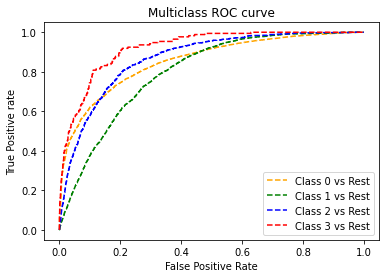

In [34]:
pred_prob_ebm = ebm.predict_proba(X_train)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train, pred_prob_ebm[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

#### Test data performance

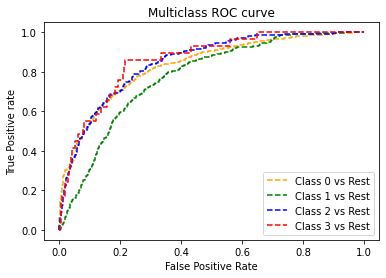

In [35]:
pred_prob_ebm = ebm.predict_proba(X_test)

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_ebm[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

#### Findings in the variable 'Avg.CritFine'
- 0:   Grade A (Latest Inspection Score 1-13)
- 1:   Grade B (Latest Inspection Score 14-27)
- 2:   Grade C (Latest Inspection Score 28-50)
- 3:   Grade D (Latest Inspection Score above 50)


In [36]:
# [1] confirming the result of graph with data: Avg.CritFine
# checking stats of Avg.CritFine

avg_crit_fine = MASTER_dropped_correlated['Avg.CritFine']
avg_crit_fine = pd.DataFrame(data=avg_crit_fine)
avg_crit_fine.describe()

# average of Avg.CritFine is $1151.50

,Avg.CritFine
count,25943.000000
mean,1151.469451
std,842.142892
min,0.000000
25%,600.000000
50%,1000.000000
75%,1600.000000
max,7566.666667


In [37]:
# Generating multiple percentiles with df.quantile()
print(avg_crit_fine.quantile(q=[0.9, 0.95, 0.99]))


      Avg.CritFine
0.90   2275.000000
0.95   2750.000000
0.99   3667.545455


In [38]:
# coutning the grades with Avg.CritFine of above $4999
grade_count_of_AvgCritFine_above_4999 = MASTER_dropped_correlated[MASTER_dropped_correlated['Avg.CritFine'] > 4999].sort_values(by='CAMIS')['TARGET'].value_counts() 
grade_count_of_AvgCritFine_above_4999


D    10
C     9
B     4
A     2
Name: TARGET, dtype: int64

<AxesSubplot:>

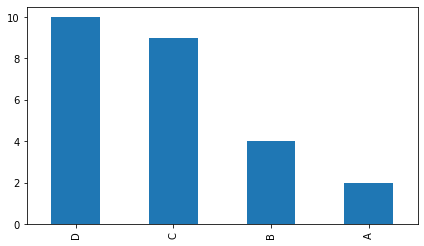

In [39]:
grade_count_of_AvgCritFine_above_4999.plot(kind="bar",figsize=(7, 4))


#### Findings in the variable 'INSP FREQ'
- 0:   Grade A (Latest Inspection Score 1-13)
- 1:   Grade B (Latest Inspection Score 14-27)
- 2:   Grade C (Latest Inspection Score 28-50)
- 3:   Grade D (Latest Inspection Score above 50)


In [40]:
# [2] confirming the result of graph with data: INSP FREQ
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/

INSP_FREQ_7 = MASTER_dropped_correlated[MASTER_dropped_correlated['INSP FREQ']==7]
INSP_FREQ_7


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
19883,50085445,Brooklyn,BELMONT AVENUE,11208,African,2019-02-21,06C,Critical,58.0,Pre-permit (Operational) / Initial Inspection,2019,2.0,7.0,5.0,300.0,42.857143,42403.0,25604184.0,1.0,828.571429,A,2,579,1,0,1.550707e+18
21016,50089669,Brooklyn,2 AVENUE,11220,Coffee/Tea,2019-04-17,08A,Not Critical,12.0,Pre-permit (Operational) / Initial Inspection,2019,13.0,7.0,7.0,200.0,28.571429,50191.0,25604184.0,1.0,978.571429,A,2,122,21,0,1.555459e+18


In [41]:
INSP_FREQ_7_grade_count = INSP_FREQ_7['TARGET'].value_counts() 
restaurant_number = INSP_FREQ_7['TARGET'].count()

print(f"\nThere are {restaurant_number} restaurants that have an annual inspection frequency of 7 from 2018-2021:" )
print(INSP_FREQ_7_grade_count)           



There are 2 restaurants that have an annual inspection frequency of 7 from 2018-2021:
A    2
B    0
C    0
D    0
Name: TARGET, dtype: int64


In [42]:
# [2] confirming the result of graph with data: INSP FREQ
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/


INSP_FREQ_6 = MASTER_dropped_correlated[MASTER_dropped_correlated['INSP FREQ']==6]
INSP_FREQ_6


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
1305,40604769,Manhattan,AMSTERDAM AVENUE,10025,Pizza,2019-01-17,02B,Critical,34.0,Cycle Inspection / Initial Inspection,2019,7.0,6.0,6.0,600.0,100.000000,83276.12245,1.945350e+07,NaN,0.000000,A,3,459,65,0,1.547683e+18
2886,41060193,Manhattan,ORCHARD STREET,10002,Australian,2018-01-17,04F,Critical,42.0,Cycle Inspection / Initial Inspection,2018,12.0,6.0,6.0,600.0,100.000000,36982.00000,1.617485e+07,2.0,2025.000000,A,3,1669,5,0,1.516147e+18
3860,41236780,Queens,BEACH 20 STREET,11691,Caribbean,2018-01-11,06B,Critical,24.0,Cycle Inspection / Initial Inspection,2018,7.0,6.0,5.0,300.0,50.000000,50267.00000,2.272149e+07,1.0,1516.666667,A,4,554,15,0,1.515629e+18
5689,41450604,Queens,UNION TURNPIKE,11366,Jewish/Kosher,2019-02-06,10B,Not Critical,17.0,Cycle Inspection / Initial Inspection,2019,13.0,6.0,6.0,200.0,33.333333,83276.12245,1.945350e+07,NaN,0.000000,A,4,1989,48,0,1.549411e+18
6426,41532937,Queens,ROOSEVELT AVENUE,11377,Bakery Products/Desserts,2019-01-10,10F,Not Critical,11.0,Cycle Inspection / Initial Inspection,2019,8.0,6.0,5.0,200.0,33.333333,58948.00000,2.272149e+07,1.0,658.333333,A,4,1801,7,0,1.547078e+18
9764,50003549,Manhattan,WEST 37 STREET,10018,Latin American,2018-04-20,04M,Critical,57.0,Cycle Inspection / Initial Inspection,2018,12.0,6.0,5.5,350.0,58.333333,83276.12245,1.945350e+07,NaN,0.000000,A,3,2113,51,0,1.524182e+18
20052,50086126,Manhattan,GREENE STREET,10012,American,2019-03-19,06C,Critical,92.0,Pre-permit (Operational) / Initial Inspection,2019,5.0,6.0,5.0,300.0,50.000000,106467.00000,1.617485e+07,1.0,675.000000,A,3,1216,2,0,1.552954e+18
20171,50086524,Bronx,WESTCHESTER SQ,10461,Sandwiches,2019-01-10,02G,Critical,37.0,Pre-permit (Operational) / Initial Inspection,2019,7.0,6.0,6.0,600.0,100.000000,58305.00000,1.413149e+07,1.0,975.000000,A,1,2262,70,0,1.547078e+18
20326,50087092,Queens,ROCKAWAY BLVD,11434,Pizza,2019-01-22,08A,Not Critical,28.0,Pre-permit (Operational) / Initial Inspection,2019,13.0,6.0,5.0,200.0,33.333333,64087.00000,2.272149e+07,1.0,916.666667,A,4,1782,65,0,1.548115e+18
20413,50087415,Manhattan,PEARL STREET,10005,Hawaiian,2019-01-10,06B,Critical,25.0,Pre-permit (Operational) / Initial Inspection,2019,5.0,6.0,5.0,300.0,50.000000,189702.00000,1.617485e+07,1.0,608.333333,A,3,1689,39,0,1.547078e+18


In [43]:
INSP_FREQ_6_grade_count = INSP_FREQ_6['TARGET'].value_counts() 
restaurant_number = INSP_FREQ_6['TARGET'].count()

print(f"\nThere are {restaurant_number} restaurants that have an annual inspection frequency of 6 from 2018-2021:" )
print(INSP_FREQ_6_grade_count)           
    


There are 13 restaurants that have an annual inspection frequency of 6 from 2018-2021:
A    13
B     0
C     0
D     0
Name: TARGET, dtype: int64


In [44]:
# [2] confirming the result of graph with data: INSP FREQ
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/


INSP_FREQ_5 = MASTER_dropped_correlated[MASTER_dropped_correlated['INSP FREQ']==5]
INSP_FREQ_5


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
424,40388260,Brooklyn,13 AVENUE,11219,Jewish/Kosher,2019-02-26,08A,Not Critical,24.0,Cycle Inspection / Initial Inspection,2019,12.0,5.0,5.0,200.0,40.0,40683.0,25604184.0,1.0,1070.0,A,2,53,48,0,1.551139e+18
495,40391808,Queens,ROCKAWAY BOULEVARD,11422,Pancakes/Waffles,2019-03-25,04L,Critical,11.0,Cycle Inspection / Initial Inspection,2019,11.0,5.0,5.0,350.0,70.0,88130.0,22721487.0,1.0,390.0,A,4,1783,63,0,1.553472e+18
589,40395505,Queens,LINDEN BOULEVARD,11411,Caribbean,2018-03-24,02B,Critical,24.0,Cycle Inspection / Initial Inspection,2018,8.0,5.0,5.0,600.0,120.0,98207.0,22721487.0,1.0,880.0,A,4,1466,15,0,1.521850e+18
611,40396020,Manhattan,WEST 11 STREET,10011,Mexican,2019-02-05,04L,Critical,17.0,Cycle Inspection / Initial Inspection,2019,11.0,5.0,5.0,350.0,70.0,138272.0,16174853.0,1.0,640.0,A,3,2087,54,0,1.549325e+18
612,40396037,Manhattan,MADISON AVENUE,10022,Sandwiches,2019-05-16,04M,Critical,117.0,Cycle Inspection / Initial Inspection,2019,11.0,5.0,5.0,350.0,70.0,150718.0,16174853.0,1.0,1480.0,A,3,1493,70,0,1.557965e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22202,50095107,Manhattan,3 AVENUE,10016,Greek,2019-07-05,06C,Critical,73.0,Pre-permit (Non-operational) / Initial Inspection,2019,9.0,5.0,5.0,300.0,60.0,126628.0,16174853.0,1.0,730.0,A,3,164,37,0,1.562285e+18
22218,50095140,Queens,JUNCTION BLVD,11368,Latin American,2021-10-28,04H,Critical,20.0,Pre-permit (Operational) / Initial Inspection,2021,3.0,5.0,3.0,600.0,120.0,54211.0,22721487.0,1.0,450.0,A,4,1380,51,0,1.635379e+18
23298,50100492,Queens,UNION ST,11354,Korean,2019-11-08,06A,Critical,53.0,Pre-permit (Operational) / Initial Inspection,2019,2.0,5.0,4.0,300.0,60.0,40786.0,22721487.0,1.0,580.0,A,4,1986,50,0,1.573171e+18
24692,50106610,Queens,30TH AVE,11102,Pizza,2021-07-19,04L,Critical,18.0,Pre-permit (Operational) / Initial Inspection,2021,9.0,5.0,5.0,350.0,70.0,71382.0,22721487.0,1.0,1580.0,A,4,168,65,0,1.626653e+18


In [45]:
INSP_FREQ_5_grade_count = INSP_FREQ_5['TARGET'].value_counts() 
restaurant_number = INSP_FREQ_5['TARGET'].count()

print(f"\nThere are {restaurant_number} restaurants that have an annual inspection frequency of 5 from 2018-2021:" )
print(INSP_FREQ_5_grade_count)
          


There are 121 restaurants that have an annual inspection frequency of 5 from 2018-2021:
A    92
B    26
C     2
D     1
Name: TARGET, dtype: int64


In [46]:
# finding the worst performed restaurant

bad_actors = INSP_FREQ_5[INSP_FREQ_5['TARGET'] == 'D'] 
bad_actors


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
15153,50058287,Manhattan,9 AVENUE,10001,Japanese,2018-02-12,02B,Critical,58.0,Cycle Inspection / Re-inspection,2018,60.0,5.0,4.0,600.0,120.0,92840.0,16174853.0,1.0,1240.0,D,3,406,47,3,1.518394e+18


In [47]:
# checking all the records of 'bad_actors' in the raw data
raw_data = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
raw_data


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41671751,GULSHAN TERRACE,Queens,5915,37 AVENUE,11377.0,7184574577,Bangladeshi,1/11/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,1/11/2018,1/29/2022,Cycle Inspection / Initial Inspection,40.749876,-73.903224,402.0,26.0,25900.0,4027374.0,4.011980e+09,QN63
1,41238209,TOWER'S CAFE,Manhattan,506,LENOX AVENUE,10037.0,2129394521,American,1/14/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,11.0,A,1/14/2019,1/29/2022,Cycle Inspection / Initial Inspection,40.814351,-73.940658,110.0,9.0,21200.0,1053899.0,1.017330e+09,MN03
2,41218954,MARIACHI TACO,Brooklyn,3428,FULTON STREET,11208.0,7182358880,Tex-Mex,4/3/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,4/3/2018,1/29/2022,Cycle Inspection / Initial Inspection,40.684500,-73.869152,305.0,37.0,118400.0,3092961.0,3.041500e+09,BK83
3,41218954,MARIACHI TACO,Brooklyn,3428,FULTON STREET,11208.0,7182358880,Tex-Mex,4/3/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6.0,A,4/3/2018,1/29/2022,Cycle Inspection / Initial Inspection,40.684500,-73.869152,305.0,37.0,118400.0,3092961.0,3.041500e+09,BK83
4,50033448,C. LO CAFE,Brooklyn,39,BUSHWICK AVENUE,11211.0,3479873402,American,7/3/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,11.0,A,7/3/2017,1/29/2022,Cycle Inspection / Initial Inspection,40.713580,-73.941495,301.0,34.0,48100.0,3070395.0,3.029190e+09,BK90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374603,40984211,LONG ISLAND UNIVERSITY - SHARK BITE,Brooklyn,1,UNIVERSITY PLAZA,11201.0,7182466466,American,3/11/2020,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,27.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.691743,-73.981544,302.0,35.0,3100.0,3338885.0,3.020850e+09,BK68
374604,41588029,PIERRE LOTI MIDTOWN,Manhattan,30012,EAST 52 STREET,NaN,2127555684,Mediterranean,1/22/2020,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,1/22/2020,1/29/2022,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
374605,50014027,XIAO WEI MALA YABU,Queens,13655,ROOSEVELT AVE,11354.0,6466238886,Chinese,12/7/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7.0,A,12/7/2017,1/29/2022,Cycle Inspection / Initial Inspection,40.760024,-73.828314,407.0,20.0,87100.0,4112510.0,4.049800e+09,QN22
374606,40945916,CALIBELLA BAKERY,Brooklyn,164,WYCKOFF AVENUE,11237.0,7184973614,Bakery Products/Desserts,12/6/2021,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,25.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.702382,-73.916165,304.0,37.0,44300.0,3075160.0,3.032900e+09,BK77


In [48]:
raw_data[raw_data['CAMIS']==50058287].sort_values(by='INSPECTION DATE')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
153636,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,04L,Evidence of mice or live mice present in facil...,Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
296790,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,04N,Filth flies or food/refuse/sewage-associated (...,Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
10260,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,10B,Plumbing not properly installed or maintained;...,Not Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
206947,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,02G,Cold food item held above 41º F (smoked fish a...,Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
192431,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,04M,Live roaches present in facility's food and/or...,Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
106185,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
186808,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,02B,Hot food item not held at or above 140º F.,Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
142357,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,11/1/2018,Establishment Closed by DOHMH. Violations were...,08A,Facility not vermin proof. Harborage or condit...,Not Critical,60.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
227774,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,12/12/2017,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,23.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13
352534,50058287,KIKU SUSHI,Manhattan,235,9 AVENUE,10001.0,2126273660,Japanese,12/12/2017,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,23.0,NaN,NaN,1/29/2022,Cycle Inspection / Initial Inspection,40.747381,-74.000686,104.0,3.0,9300.0,1012801.0,1.007220e+09,MN13


In [49]:
# checking inspection result history of 'bad_actors' in the raw data
raw_data_bad_actor= raw_data[raw_data['CAMIS']==50058287].sort_values(by='INSPECTION DATE')
raw_data_bad_actor

raw_data_bad_actor_extracted = raw_data_bad_actor[['CAMIS', 'INSPECTION DATE', 'SCORE']]
raw_data_bad_actor_extracted

raw_data_bad_actor_extracted.sort_values(by='INSPECTION DATE').drop_duplicates()


,CAMIS,INSPECTION DATE,SCORE
153636,50058287,11/1/2018,60.0
96814,50058287,12/12/2017,23.0
334771,50058287,2/10/2017,18.0
333697,50058287,2/12/2018,58.0
153225,50058287,2/15/2018,0.0
192890,50058287,2/24/2017,17.0
139732,50058287,6/6/2018,14.0
256544,50058287,7/2/2018,12.0


In [50]:
CAMIS = 50058287
INSPECTION_DATE = ['2/12/2018', '2/15/2018', '6/6/2018', '7/2/2018', '11/1/2018']
SCORE = [58, 0, 14, 12, 60]


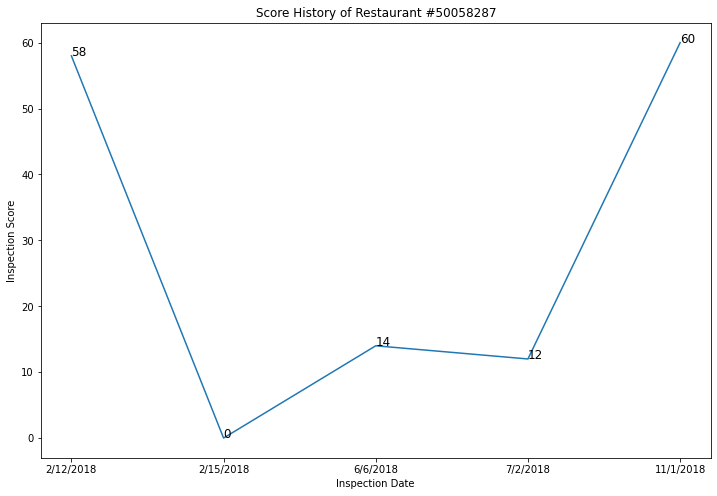

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

plt.plot(INSPECTION_DATE, SCORE)

# naming the x axis
plt.xlabel('Inspection Date')
# naming the y axis
plt.ylabel('Inspection Score')
 
# giving a title to my graph
plt.title('Score History of Restaurant #50058287')

for index in range(len(INSPECTION_DATE)):
  ax.text(INSPECTION_DATE[index], SCORE[index], SCORE[index], size=12)

plt.show()

#### Findings in the variable 'CRITICAL FREQ'
- 0:   Grade A (Latest Inspection Score 1-13)
- 1:   Grade B (Latest Inspection Score 14-27)
- 2:   Grade C (Latest Inspection Score 28-50)
- 3:   Grade D (Latest Inspection Score above 50)


In [52]:
MASTER_dropped_for_modeling.describe()

,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Avg.CritFine,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
count,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,2.594300e+04,25943.000000,25943.000000,25943.000000,25943.000000,25943.000000,2.594300e+04
mean,1.697918,1.499007,308.061905,215.010148,83276.122450,1.945350e+07,1151.469451,2.865860,1125.128127,33.163165,0.276838,-2.147484e+09
std,0.857532,0.889542,154.858777,134.775248,34817.554314,5.017781e+06,842.142892,0.984718,670.495607,25.879621,0.600085,0.000000e+00
min,1.000000,0.000000,0.000000,0.000000,21447.000000,4.710350e+06,0.000000,0.000000,0.000000,0.000000,0.000000,-2.147484e+09
25%,1.000000,1.000000,200.000000,120.000000,56911.000000,1.617485e+07,600.000000,2.000000,510.000000,7.000000,0.000000,-2.147484e+09
50%,1.500000,1.000000,300.000000,200.000000,81228.000000,1.945350e+07,1000.000000,3.000000,1141.000000,26.000000,0.000000,-2.147484e+09
75%,2.000000,2.000000,350.000000,300.000000,103792.000000,2.272149e+07,1600.000000,4.000000,1693.000000,53.000000,0.000000,-2.147484e+09
max,7.000000,7.000000,1000.000000,850.000000,250001.000000,2.560418e+07,7566.666667,5.000000,2331.000000,86.000000,3.000000,-2.147484e+09


In [53]:
MASTER_dropped_for_modeling.head(30)
MASTER_dropped_for_modeling.sort_values(by='CRITICAL FREQ')

,ZIPCODE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,Avg.CritFine,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
24361,10463,1.0,0.0,200.0,200.000000,58408.00000,1.413149e+07,0.000000,1,1412,61,0,-2147483648
20693,10307,1.0,0.0,200.0,200.000000,85103.00000,4.710350e+06,0.000000,5,454,18,0,-2147483648
20720,10019,1.0,0.0,0.0,0.000000,103792.00000,1.617485e+07,0.000000,3,2128,2,0,-2147483648
20714,11355,1.0,0.0,200.0,200.000000,42507.00000,2.272149e+07,0.000000,4,1408,65,0,-2147483648
20773,11426,1.0,0.0,200.0,200.000000,98987.00000,2.272149e+07,0.000000,4,1273,70,0,-2147483648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,10461,6.0,6.0,600.0,100.000000,58305.00000,1.413149e+07,975.000000,1,2262,70,0,-2147483648
2886,10002,6.0,6.0,600.0,100.000000,36982.00000,1.617485e+07,2025.000000,3,1669,5,0,-2147483648
5689,11366,6.0,6.0,200.0,33.333333,83276.12245,1.945350e+07,0.000000,4,1989,48,0,-2147483648
3575,11419,6.5,6.0,300.0,46.153846,75835.00000,2.272149e+07,1561.538462,4,6,42,0,-2147483648


In [54]:
# [4] confirming the result of graph with data: CRITICAL FREQ
# extracting certain data by filtering
# https://swdevnotes.com/python/2021/how-to-filter-a-pandas-dataframe/

# listing inespection results with CRITICAL FREQ of 7
MASTER_dropped_correlated[MASTER_dropped_correlated['CRITICAL FREQ'] == 7].sort_values(by='CAMIS')


,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
21016,50089669,Brooklyn,2 AVENUE,11220,Coffee/Tea,2019-04-17,08A,Not Critical,12.0,Pre-permit (Operational) / Initial Inspection,2019,13.0,7.0,7.0,200.0,28.571429,50191.0,25604184.0,1.0,978.571429,A,2,122,21,0,1.555459e+18


In [55]:
# listing inespection results with CRITICAL FREQ of 6
MASTER_dropped_correlated[MASTER_dropped_correlated['CRITICAL FREQ'] == 6].sort_values(by='CAMIS')

,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
1305,40604769,Manhattan,AMSTERDAM AVENUE,10025,Pizza,2019-01-17,02B,Critical,34.0,Cycle Inspection / Initial Inspection,2019,7.0,6.0,6.0,600.0,100.000000,83276.12245,1.945350e+07,NaN,0.000000,A,3,459,65,0,1.547683e+18
2886,41060193,Manhattan,ORCHARD STREET,10002,Australian,2018-01-17,04F,Critical,42.0,Cycle Inspection / Initial Inspection,2018,12.0,6.0,6.0,600.0,100.000000,36982.00000,1.617485e+07,2.0,2025.000000,A,3,1669,5,0,1.516147e+18
3575,41193517,Queens,101 AVENUE,11419,Indian,2018-04-13,06E,Critical,12.0,Cycle Inspection / Initial Inspection,2018,9.0,6.5,6.0,300.0,46.153846,75835.00000,2.272149e+07,1.0,1561.538462,A,4,6,42,0,1.523578e+18
5689,41450604,Queens,UNION TURNPIKE,11366,Jewish/Kosher,2019-02-06,10B,Not Critical,17.0,Cycle Inspection / Initial Inspection,2019,13.0,6.0,6.0,200.0,33.333333,83276.12245,1.945350e+07,NaN,0.000000,A,4,1989,48,0,1.549411e+18
20171,50086524,Bronx,WESTCHESTER SQ,10461,Sandwiches,2019-01-10,02G,Critical,37.0,Pre-permit (Operational) / Initial Inspection,2019,7.0,6.0,6.0,600.0,100.000000,58305.00000,1.413149e+07,1.0,975.000000,A,1,2262,70,0,1.547078e+18


In [56]:
# listing inespection results with CRITICAL FREQ of 5
MASTER_dropped_correlated[MASTER_dropped_correlated['CRITICAL FREQ'] == 5].sort_values(by='CAMIS')

,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
424,40388260,Brooklyn,13 AVENUE,11219,Jewish/Kosher,2019-02-26,08A,Not Critical,24.0,Cycle Inspection / Initial Inspection,2019,12.0,5.0,5.0,200.0,40.0,40683.0,25604184.0,1.0,1070.000000,A,2,53,48,0,1.551139e+18
495,40391808,Queens,ROCKAWAY BOULEVARD,11422,Pancakes/Waffles,2019-03-25,04L,Critical,11.0,Cycle Inspection / Initial Inspection,2019,11.0,5.0,5.0,350.0,70.0,88130.0,22721487.0,1.0,390.000000,A,4,1783,63,0,1.553472e+18
589,40395505,Queens,LINDEN BOULEVARD,11411,Caribbean,2018-03-24,02B,Critical,24.0,Cycle Inspection / Initial Inspection,2018,8.0,5.0,5.0,600.0,120.0,98207.0,22721487.0,1.0,880.000000,A,4,1466,15,0,1.521850e+18
611,40396020,Manhattan,WEST 11 STREET,10011,Mexican,2019-02-05,04L,Critical,17.0,Cycle Inspection / Initial Inspection,2019,11.0,5.0,5.0,350.0,70.0,138272.0,16174853.0,1.0,640.000000,A,3,2087,54,0,1.549325e+18
612,40396037,Manhattan,MADISON AVENUE,10022,Sandwiches,2019-05-16,04M,Critical,117.0,Cycle Inspection / Initial Inspection,2019,11.0,5.0,5.0,350.0,70.0,150718.0,16174853.0,1.0,1480.000000,A,3,1493,70,0,1.557965e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,50090461,Queens,40TH RD,11354,Chinese,2019-04-27,02G,Critical,82.0,Pre-permit (Operational) / Initial Inspection,2019,25.0,5.0,5.0,600.0,120.0,40786.0,22721487.0,1.0,1380.000000,B,4,220,18,1,1.556323e+18
22202,50095107,Manhattan,3 AVENUE,10016,Greek,2019-07-05,06C,Critical,73.0,Pre-permit (Non-operational) / Initial Inspection,2019,9.0,5.0,5.0,300.0,60.0,126628.0,16174853.0,1.0,730.000000,A,3,164,37,0,1.562285e+18
22372,50095961,Brooklyn,AVENUE M,11230,Eastern European,2019-08-12,04A,Critical,28.0,Pre-permit (Operational) / Initial Inspection,2019,0.0,6.0,5.0,600.0,100.0,53070.0,25604184.0,1.0,516.666667,A,2,498,27,0,1.565568e+18
24692,50106610,Queens,30TH AVE,11102,Pizza,2021-07-19,04L,Critical,18.0,Pre-permit (Operational) / Initial Inspection,2021,9.0,5.0,5.0,350.0,70.0,71382.0,22721487.0,1.0,1580.000000,A,4,168,65,0,1.626653e+18


In [57]:
# listing inespection results with CRITICAL FREQ of 4
MASTER_dropped_correlated[MASTER_dropped_correlated['CRITICAL FREQ'] == 4].sort_values(by='CAMIS')

,CAMIS,BORO,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,INSPECTION TYPE,INSPECTION YEAR,LATEST SCORE,INSP FREQ,CRITICAL FREQ,FINE AMOUNT,AVG. FINE AMOUNT,MEDIAN INCOME,TOTAL POPULATION,BINNED_Avg.CritFine,Avg.CritFine,TARGET,BORO CAT,STREET CAT,CUISINE CAT,TARGET CAT,INSPECTION DATE CLEANED
66,40365499,Bronx,EAST 161 STREET,10451,American,2019-02-14,10F,Not Critical,18.0,Cycle Inspection / Initial Inspection,2019,21.0,4.0,4.0,200.0,50.0,30349.0,14131491.0,1.0,1237.5,B,1,1009,2,1,1.550102e+18
102,40366586,Queens,MAIN STREET,11367,Jewish/Kosher,2019-03-18,08A,Not Critical,13.0,Cycle Inspection / Initial Inspection,2019,12.0,4.0,4.0,200.0,50.0,63546.0,22721487.0,1.0,587.5,A,4,1499,48,0,1.552867e+18
247,40373937,Manhattan,WEST 65 STREET,10023,Chinese,2019-03-20,10F,Not Critical,12.0,Cycle Inspection / Initial Inspection,2019,22.0,4.0,4.0,200.0,50.0,132605.0,16174853.0,1.0,1062.5,B,3,2140,18,1,1.553040e+18
269,40376204,Queens,ASCAN AVENUE,11375,Italian,2019-04-01,02H,Critical,31.0,Cycle Inspection / Initial Inspection,2019,12.0,4.0,4.0,600.0,150.0,84713.0,22721487.0,1.0,987.5,A,4,473,46,0,1.554077e+18
573,40395023,Manhattan,ELIZABETH STREET,10013,Chinese,2018-04-25,02B,Critical,24.0,Cycle Inspection / Initial Inspection,2018,12.0,4.0,4.0,600.0,150.0,113191.0,16174853.0,2.0,2787.5,A,3,1091,18,0,1.524614e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,50093932,Queens,GRAND AVE,11378,Latin American,2019-07-17,04A,Critical,68.0,Pre-permit (Operational) / Initial Inspection,2019,15.0,4.0,4.0,600.0,150.0,77710.0,22721487.0,1.0,1400.0,B,4,1194,51,1,1.563322e+18
22468,50096491,Queens,QUEENS BLVD,11375,Sandwiches,2019-08-22,06F,Critical,28.0,Pre-permit (Operational) / Initial Inspection,2019,13.0,4.0,4.0,200.0,50.0,84713.0,22721487.0,1.0,1037.5,A,4,1740,70,0,1.566432e+18
23298,50100492,Queens,UNION ST,11354,Korean,2019-11-08,06A,Critical,53.0,Pre-permit (Operational) / Initial Inspection,2019,2.0,5.0,4.0,300.0,60.0,40786.0,22721487.0,1.0,580.0,A,4,1986,50,0,1.573171e+18
24549,50106065,Manhattan,AMSTERDAM AVENUE,10025,American,2021-08-25,10F,Not Critical,25.0,Pre-permit (Operational) / Initial Inspection,2021,27.0,4.0,4.0,200.0,50.0,91624.0,16174853.0,1.0,1150.0,B,3,459,2,1,1.629850e+18
